In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

ImportError: Matplotlib requires numpy>=1.20; you have 1.18.5

In [ ]:
import os

In [ ]:
#get address such as C:\\(folder with you notebook)
dir = os.path.abspath(os.curdir)
# i suppose what your image folders placed in datasets directory 
data_dir=("/datasets")

In [ ]:
print(dir)

/home/ubuntu/busstop_project/parsers/traffic


In [ ]:
batch_size = 8
img_height = 180
img_width = 180

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/home/ubuntu/busstop_project/parsers/traffic/datasets',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

AttributeError: module 'tensorflow.keras.preprocessing' has no attribute 'image_dataset_from_directory'

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/home/ubuntu/busstop_project/parsers/traffic/datasets',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1100 files belonging to 11 classes.


Using 220 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['0', '1', '10', '2', '3', '4', '5', '6', '7', '8', '9']


2024-03-10 19:22:30.484168: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at strided_slice_op.cc:117 : INVALID_ARGUMENT: slice index 8 of dimension 0 out of bounds.


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:GPU:0}} slice index 8 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

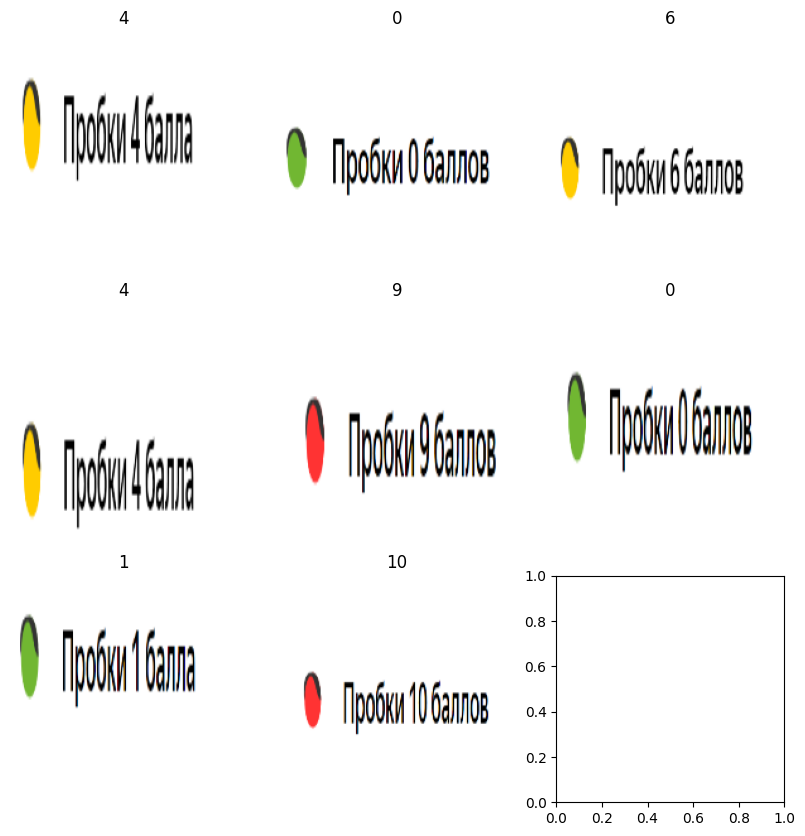

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(8, 180, 180, 3)
(8,)


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15


2024-03-10 19:22:48.957532: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:425] Loaded runtime CuDNN library: 8.3.2 but source was compiled with: 8.6.0.  CuDNN library needs to have matching major version and equal or higher minor version. If using a binary install, upgrade your CuDNN library.  If building from sources, make sure the library loaded at runtime is compatible with the version specified during compile configuration.
2024-03-10 19:22:48.958545: W tensorflow/core/framework/op_kernel.cc:1828] OP_REQUIRES failed at conv_ops_fused_impl.h:625 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'sequential_1/conv2d_3/Relu' defined at (most recent call last):
    File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel_launcher.py", line 18, in <module>
      app.launch_new_instance()
    File "/home/ubuntu/.local/lib/python3.8/site-packages/traitlets/config/application.py", line 1075, in launch_instance
      app.start()
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 739, in start
      self.io_loop.start()
    File "/home/ubuntu/.local/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 205, in start
      self.asyncio_loop.run_forever()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/usr/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 542, in dispatch_queue
      await self.process_one()
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 531, in process_one
      await dispatch(*args)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
      await result
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 359, in execute_request
      await super().execute_request(stream, ident, parent)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 775, in execute_request
      reply_content = await reply_content
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 446, in do_execute
      res = shell.run_cell(
    File "/home/ubuntu/.local/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3009, in run_cell
      result = self._run_cell(
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3064, in _run_cell
      result = runner(coro)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3269, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3448, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/home/ubuntu/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2616/446827046.py", line 2, in <module>
      history = model.fit(
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1742, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1338, in train_function
      return step_function(self, iterator)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1322, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1303, in run_step
      outputs = model.train_step(data)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 1080, in train_step
      y_pred = self(x, training=True)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/training.py", line 569, in __call__
      return super().__call__(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/sequential.py", line 405, in call
      return super().call(inputs, training=training, mask=mask)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 512, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/functional.py", line 669, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/engine/base_layer.py", line 1150, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/layers/convolutional/base_conv.py", line 321, in call
      return self.activation(outputs)
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/activations.py", line 321, in relu
      return backend.relu(
    File "/home/ubuntu/.local/lib/python3.8/site-packages/keras/src/backend.py", line 5397, in relu
      x = tf.nn.relu(x)
Node: 'sequential_1/conv2d_3/Relu'
DNN library is not found.
	 [[{{node sequential_1/conv2d_3/Relu}}]] [Op:__inference_train_function_2943]

In [ ]:
path='Weights_folder/Weights'
model.save_weights(path)

In [ ]:
model.save('gfgModel.h5')

In [ ]:
model.fit(x_train, y_train, epochs=10, callbacks=[checkpoint])

NameError: name 'model' is not defined

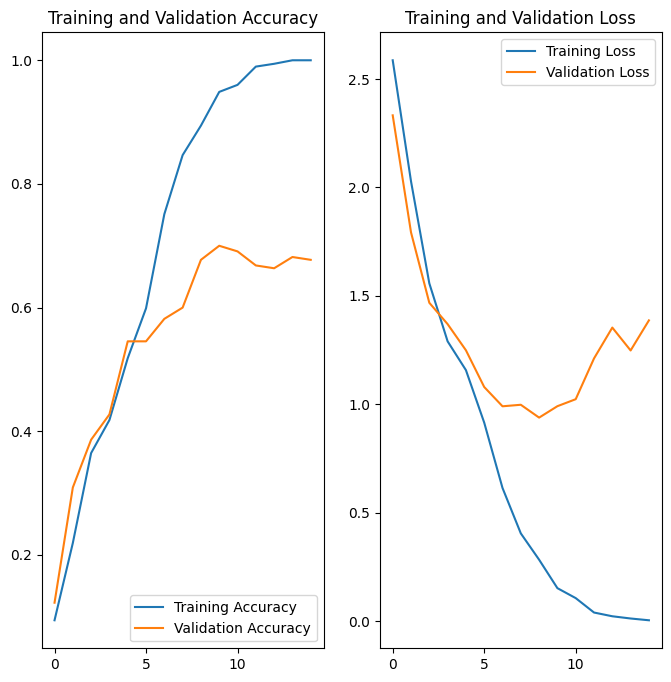

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
img = tf.keras.utils.load_img(
    'croped_scr.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 2 with a 99.82 percent confidence.


In [ ]:
pip install selenium

  Using cached typing_extensions-4.10.0-py3-none-any.whl (33 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import cv2

In [ ]:
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver import ChromeOptions
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
from time import sleep
from tqdm import tqdm

In [ ]:
from selenium import webdriver

options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(options=options)

The chromedriver version (2.41.578700) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (122.0.6261.111); currently, chromedriver 122.0.6261.94 is recommended for chrome 122.*, so it is advised to delete the driver in PATH and retry


SessionNotCreatedException: Message: session not created exception: Missing or invalid capabilities
  (Driver info: chromedriver=2.41.578700 (2f1ed5f9343c13f73144538f15c00b370eda6706),platform=Linux 5.4.0-172-generic x86_64)


In [ ]:
pip install --upgrade selenium

Requirement already up-to-date: selenium in /home/ubuntu/.local/lib/python3.8/site-packages (4.18.1)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install webdriver-manager

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager

driver = webdriver.Chrome(ChromeDriverManager().install())

AttributeError: 'str' object has no attribute 'capabilities'

In [ ]:
from selenium import webdriver

browser = webdriver.Chrome()
browser.get('http://localhost:8000')

The chromedriver version (2.41.578700) detected in PATH at /usr/local/bin/chromedriver might not be compatible with the detected chrome version (122.0.6261.111); currently, chromedriver 122.0.6261.94 is recommended for chrome 122.*, so it is advised to delete the driver in PATH and retry


SessionNotCreatedException: Message: session not created exception: Missing or invalid capabilities
  (Driver info: chromedriver=2.41.578700 (2f1ed5f9343c13f73144538f15c00b370eda6706),platform=Linux 5.4.0-172-generic x86_64)


In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

service = Service(executable_path='/home/ubuntu/busstop_project/parsers/traffic/chromedriver')
options = webdriver.ChromeOptions()
options.add_argument("--no-sandbox")
driver = webdriver.Chrome(service=service, options=options)

SessionNotCreatedException: Message: session not created: Chrome failed to start: exited normally.
  (session not created: DevToolsActivePort file doesn't exist)
  (The process started from chrome location /opt/google/chrome/chrome is no longer running, so ChromeDriver is assuming that Chrome has crashed.)
Stacktrace:
#0 0x564c4e0ede93 <unknown>
#1 0x564c4dde5ce6 <unknown>
#2 0x564c4de1a6fa <unknown>
#3 0x564c4de166ed <unknown>
#4 0x564c4de5f71c <unknown>
#5 0x564c4de52c53 <unknown>
#6 0x564c4de23db3 <unknown>
#7 0x564c4de2477e <unknown>
#8 0x564c4e0b37cb <unknown>
#9 0x564c4e0b77e5 <unknown>
#10 0x564c4e0a10e1 <unknown>
#11 0x564c4e0b8372 <unknown>
#12 0x564c4e0851bf <unknown>
#13 0x564c4e0dc488 <unknown>
#14 0x564c4e0dc683 <unknown>
#15 0x564c4e0ed044 <unknown>
#16 0x7feee9d3b609 start_thread


In [ ]:
  from selenium.webdriver.common.by import By

In [ ]:
driver.get("https://yandex.ru/maps/213/moscow/probki/?ll=37.617700%2C55.755863&source=traffic&z=10")

In [ ]:
sleep(5)
driver.save_screenshot('screenie.png')

True

In [ ]:
img = cv2.imread("screenie.png")
crop_img = img[250:320, 0:400]
#cv2.imshow("cropped", crop_img)
#cv2.waitKey(0)
cv2.imwrite("croped_scr.png", crop_img)

True

In [ ]:
img = tf.keras.utils.load_img(
    'D:\Study\MIPT\VKR\parser_traffic\croped_scr.png', target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 20ms/step
This image most likely belongs to 2 with a 99.97 percent confidence.
